# Visualizing the Relationships Between Quantitative Features

So far we've looked at the distribution of single features, the distribution of two categorical features, and how to visualize differences between groups.  In this lesson we'll discuss how to look at the relationships between two quantitative features.  

## Healthcare Dataset:

How do personal features like age, BMI, smoking status, diet and exercise effect how much you pay for healthcare? Do older people, in general, pay more for healthcare?  How do other factors like BMI and smoking effect your healthcare costs?  We'll find the answers to these questions in this lesson.

Let's import pandas, matplotlib and seaborn and read in the data.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

health_df = pd.read_csv('assets/healthcare_data.csv')

health_df.head()

,Age,Smoker,BMI,ExerciseFrequency,DietQuality,HealthcareExpenses
0,50,No,32.4,3.9,7.2,6889.13
1,38,Yes,27.4,0.0,5.1,8201.14
2,50,No,21.7,1.8,7.8,5273.34
3,32,No,21.6,3.7,9.2,3683.89
4,23,No,30.3,5.2,4.1,3099.13


In this lesson, we are looking at the relationships between quantitative features.  Which three features are quantitative and continuous?  

The classic figure for examining the relationship between two quantitative features is called a scatterplot.  You've probably made them before.  We graph the value of one feature on the x-axis and the value of the other feature on the y-axis.  The pattern formed by the data tells us about the relationship between the two features.

To start, we are going to graph the relationship between age (on the x-axis) and healthcare charges (on the y-axis).

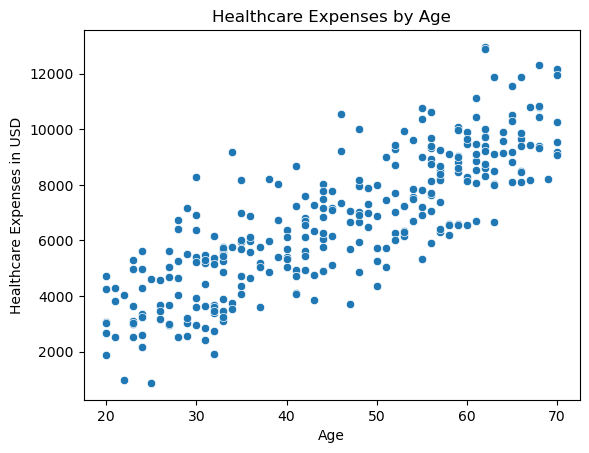

In [4]:
sns.scatterplot(x='Age', y='HealthcareExpenses', data=health_df)
plt.title('Healthcare Expenses by Age')
plt.ylabel('Healthcare Expenses in USD')
plt.show()

In general, we see that healthcare chargest tend to increase as people get older.  However, that relationship isn't perfect.  There's a lot of varibility in how much individuals of the same age pay for healthcare.

Because the data points fall roughly in a line, we can represent the relationship between the two features with a linear model.  You'll talk a lot more about exactly how this works - how the model is fit to the data,how to tell if it's a good model or not - in the machine learning course.

Let's see if we can figure out what other features in our data might explain some of this variability.

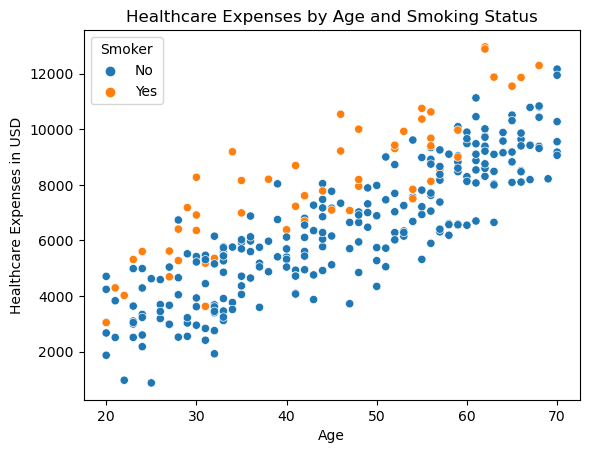

In [5]:
sns.scatterplot(x='Age', y='HealthcareExpenses', hue='Smoker', data=health_df)
plt.title('Healthcare Expenses by Age and Smoking Status')
plt.ylabel('Healthcare Expenses in USD')
plt.show()

Smokers seem to have consistently higher healthcare charges than nonsmokers.  What about BMI?

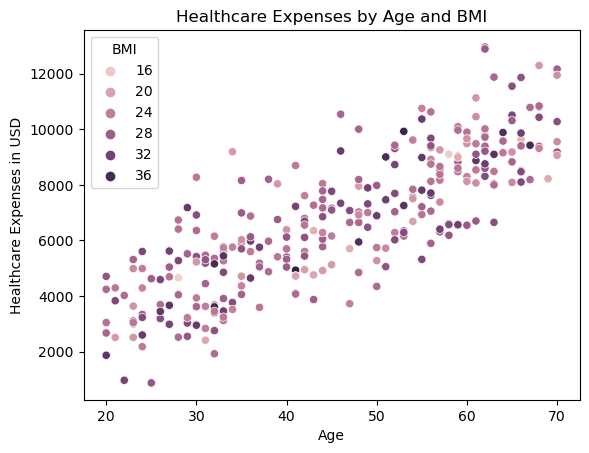

In [6]:
sns.scatterplot(x='Age', y='HealthcareExpenses', hue='BMI', data=health_df)
plt.title('Healthcare Expenses by Age and BMI')
plt.ylabel('Healthcare Expenses in USD')
plt.show()

It looks like there's a mix of people with different BMIs all throughout the data.  What if we categorize BMI?



In [8]:
health_df.loc[ health_df['BMI'] < 18, 'BMI_cat' ] = 'Underweight'
health_df.loc[ (health_df['BMI'] >= 18) & ( health_df['BMI'] < 25 ) , 'BMI_cat' ] = 'Normal'
health_df.loc[ (health_df['BMI'] >= 25) & ( health_df['BMI'] < 30 ) , 'BMI_cat' ] = 'Overweight'
health_df.loc[ health_df['BMI'] >= 30, 'BMI_cat' ] = 'Obese'

health_df['BMI_cat'].value_counts()

BMI_cat
Overweight     130
Normal          94
Obese           73
Underweight      3
Name: count, dtype: int64

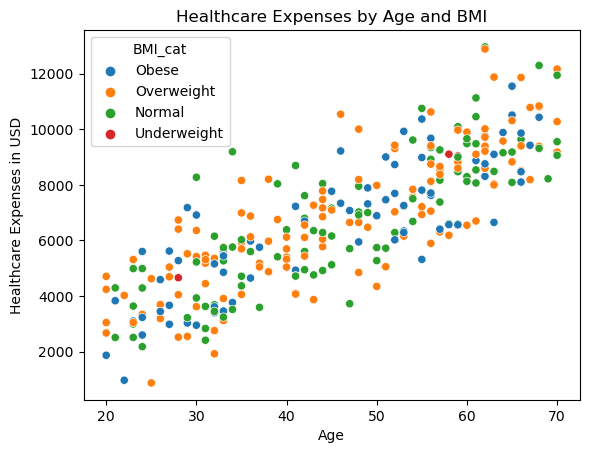

In [10]:
sns.scatterplot(x='Age', y='HealthcareExpenses', hue='BMI_cat', data=health_df)
plt.title('Healthcare Expenses by Age and BMI')
plt.ylabel('Healthcare Expenses in USD')
plt.show()

Nope - not really!

## Modeling

But we're just running on vibes.  How can we make this more rigorous?

In data science, we are often interested in developing a model of our data.  A model is a mathematical representation of the general relationship present in our data.  

**If the pattern of our data is roughly a line (either in the positive or negative direction) we can represent our data using a line - aka a linear model - aka linear regression.**  Because our data is clearly in three different groups, it makes sense to represent our data using three lines rather than one.  

You'll learn much more about the ins and outs of this procedure, known as linear regression, in the machine learning course.  For now, it's enough to see a visual representation of using a model to summarize the relationship of age to healthcare costs for each group.  

**Ideally your linear regression line should run right through the middle of your data, crossing as many points as possible.  There should be an approximately equal number of points above and below the regression line.**

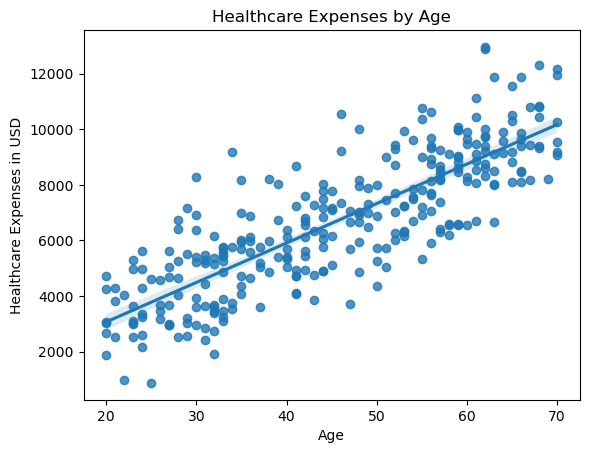

In [11]:
sns.regplot(x='Age', y='HealthcareExpenses', data=health_df)
plt.title('Healthcare Expenses by Age')
plt.ylabel('Healthcare Expenses in USD')
plt.show()

We couldn't use this model to perfectly predict the healthcare costs for an individual at a specific age.  However, if you were a healthcare economist, it could give you a ballpark figure how how much you expect costs to go up as people age depending on if they were at a low, medium or high claim risk.

In the words of the famous statistician George Box (who is different from the boxplot guy, John Tukey):

**"All models are wrong, but some are useful."**

## But how exactly do we determine if this model is a good fit or not?

We generally measure model fit with something called R-squared.  R-squared ranges from 0 - 1 (sometimes represented from 0 % - 100 %).  There are no strict rules for what makes a "good" R-squared or a "bad" R-squared (more vibes) but the closer you get to 1 (or 100%) the better the model fits.

The definition of R-squared is "The percent of variability in the data that is explained by the model."  Having 100% of your data explained by the model is a good thing.

**You are going to learn a different way to do this calculation in the next class.  That's okay.  Sometimes there's more than one way to do something.  The interpretation of R-squared in both cases is the same.**

In [14]:
X = sm.add_constant(health_df['Age'])
y = health_df['HealthcareExpenses']

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     HealthcareExpenses   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     645.6
Date:                Fri, 07 Nov 2025   Prob (F-statistic):           1.45e-76
Time:                        09:40:54   Log-Likelihood:                -2592.7
No. Observations:                 300   AIC:                             5189.
Df Residuals:                     298   BIC:                             5197.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        228.2692    266.064      0.858      0.392    -295.334     751.873
Age          142.0002      5.589     25.408      0.000     131.002     152.999
==============================================================================
Omnibus:                        5.373   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                5.307
Skew:                           0.326   Prob(JB):                       0.0704
Kurtosis:                       3.018   Cond. No.                         160.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Is the model improved if we add in smoking?

In [18]:
health_df.loc[health_df['Smoker'] == 'Yes', 'Smoker_num' ] = 1
health_df.loc[health_df['Smoker'] == 'No', 'Smoker_num' ] = 0

X = sm.add_constant(health_df[['Age', 'Smoker_num']])
y = health_df['HealthcareExpenses']

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     HealthcareExpenses   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     527.4
Date:                Fri, 07 Nov 2025   Prob (F-statistic):           1.84e-98
Time:                        09:49:39   Log-Likelihood:                -2538.3
No. Observations:                 300   AIC:                             5083.
Df Residuals:                     297   BIC:                             5094.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -234.6253    225.970     -1.038      0.300    -679.330     210.079
Age          144.2934      4.674     30.874      0.000     135.096     153.491
Smoker_num  1956.5330    171.651     11.398      0.000    1618.727    2294.339
==============================================================================
Omnibus:                        5.728   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                3.499
Skew:                          -0.019   Prob(JB):                        0.174
Kurtosis:                       2.472   Cond. No.                         165.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What about BMI?

In [19]:
X = sm.add_constant(health_df[['Age', 'Smoker_num', 'BMI']])
y = health_df['HealthcareExpenses']

model = sm.OLS(y, X).fit()

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     HealthcareExpenses   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     350.4
Date:                Fri, 07 Nov 2025   Prob (F-statistic):           4.74e-97
Time:                        09:53:17   Log-Likelihood:                -2538.2
No. Observations:                 300   AIC:                             5084.
Df Residuals:                     296   BIC:                             5099.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -184.0264    504.016     -0.365      0.715   -1175.934     807.882
Age          144.2675      4.687     30.780      0.000     135.043     153.492
Smoker_num  1957.1337    172.020     11.377      0.000    1618.597    2295.671
BMI           -1.8413     16.388     -0.112      0.911     -34.092      30.410
==============================================================================
Omnibus:                        5.875   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.053   Jarque-Bera (JB):                3.563
Skew:                          -0.022   Prob(JB):                        0.168
Kurtosis:                       2.468   Cond. No.                         412.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What about Exercise Frequency and Diet Quality?

## When is a line not a good fit for the data?

Linear models are a powerful data analysis tool.  They do a great job in a lot of situations.  However, it's important to be on the lookout for times when a linear model is a poor fit for your data.  Making a visualization is often the easiest way to check for model fit issues ahead of time.

A linear model is not a good fit for your data if:

**1. Your data is made up of more than one distinct group.**

One single line won't do a good job capturing the relationships for the individual groups.  Here the regression line passes through almost none of the points.

In [20]:
salary_df = pd.read_csv('assets/salary_experience_industry.csv')

salary_df.head()

,Experience,Salary,Industry
0,7.490802,83655.542408,Tech
1,19.014286,126913.985919,Tech
2,14.639879,107981.273933,Tech
3,11.973170,96387.160258,Tech
4,3.120373,55088.881284,Tech


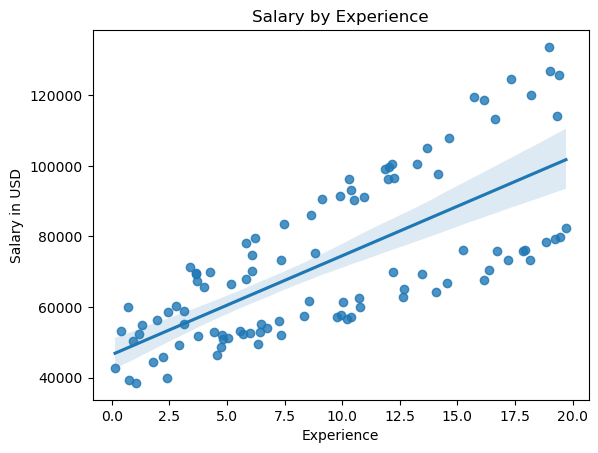

In [21]:
sns.regplot(x='Experience', y='Salary', data=salary_df)
plt.title('Salary by Experience')
plt.ylabel('Salary in USD')
plt.show()

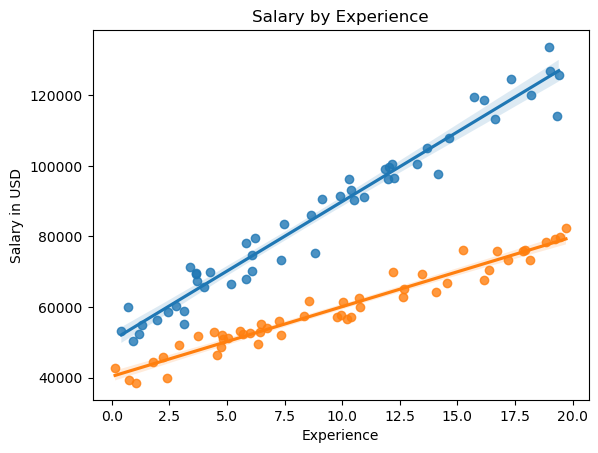

In [22]:
sns.regplot(x='Experience', y='Salary', data=salary_df.loc[salary_df['Industry'] == 'Tech'])
sns.regplot(x='Experience', y='Salary', data=salary_df.loc[salary_df['Industry'] == 'Education'])
plt.title('Salary by Experience')
plt.ylabel('Salary in USD')
plt.show()

In [23]:
X = sm.add_constant(salary_df[['Experience']])
y = salary_df['Salary']

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     102.6
Date:                Fri, 07 Nov 2025   Prob (F-statistic):           6.39e-17
Time:                        10:15:18   Log-Likelihood:                -1108.0
No. Observations:                 100   AIC:                             2220.
Df Residuals:                      98   BIC:                             2225.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.651e+04   3019.660     15.403      0.000    4.05e+04    5.25e+04
Experience  2803.4096    276.806     10.128      0.000    2254.097    3352.722
==============================================================================
Omnibus:                       43.702   Durbin-Watson:                   0.433
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.210
Skew:                           0.203   Prob(JB):                       0.0272
Kurtosis:                       1.748   Cond. No.                         20.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
salary_df.loc[salary_df['Industry'] == 'Tech', 'Industry_num' ] = 1
salary_df.loc[salary_df['Industry'] == 'Education', 'Industry_num' ] = 0

X = sm.add_constant(salary_df[['Experience', 'Industry_num']])
y = salary_df['Salary']

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     489.5
Date:                Fri, 07 Nov 2025   Prob (F-statistic):           2.08e-51
Time:                        10:17:46   Log-Likelihood:                -1023.5
No. Observations:                 100   AIC:                             2053.
Df Residuals:                      97   BIC:                             2061.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3.084e+04   1507.589     20.455      0.000    2.78e+04    3.38e+04
Experience    2961.6092    119.759     24.730      0.000    2723.921    3199.298
Industry_num  2.841e+04   1372.031     20.705      0.000    2.57e+04    3.11e+04
==============================================================================
Omnibus:                        2.653   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.265   Jarque-Bera (JB):                1.850
Skew:                           0.128   Prob(JB):                        0.396
Kurtosis:                       2.385   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**2. When there are outliers that fall far outside the normal range of the data.**

Here's an example plotting the relationship of age and fare paid in the Titanic data.  See those two people who were a little younger than 40 and paid 500 pounds for their tickets?  Those are outliers.  This model doesn't fit well because there are way more points above the line than below it, and there are big outliers at the top of the figure.

<Axes: xlabel='Age', ylabel='Fare'>

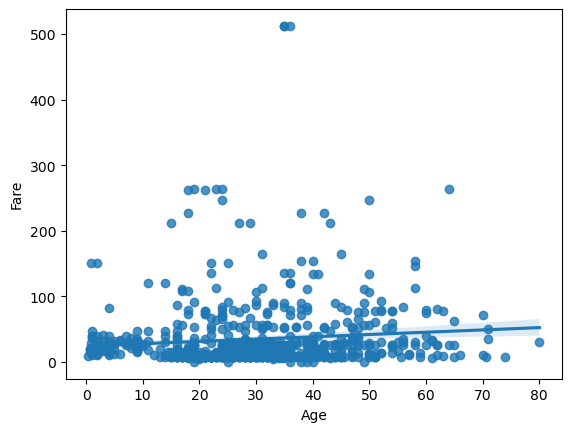

In [26]:
titanic_df = pd.read_csv('assets/titanic_passengers.csv')

sns.regplot(x='Age', y='Fare', data=titanic_df)


**3. When there is a curved rather than linear relationship in the data.**

Here is a plot of the cumulative revenue each week the film was showing.  You can see that the relationship of cumulative revenue to the number of weeks the film had been shown is curved rather than a straight line.  There are mathematical ways to transform a curved relationship into a straight line relationship, but we might not know one is present if we don't visualize the data.


<Axes: xlabel='weeknum', ylabel='cumerev'>

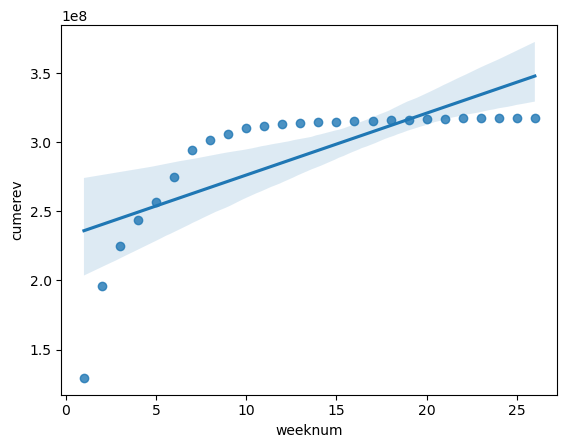

In [29]:
movie_df = pd.read_csv('assets/harrypotter.csv')

sns.regplot(x='weeknum', y='cumerev', data=movie_df.loc[movie_df['film'] == 1])

# How to tackle nonlinear relationships

This is something you'll dig into in much more detail in the machine learning class, but it's possible to model the relationship between two features with a non-linear relationship.
Often this involves some trial and error on the part of the data scientist.  In this example, we look at modeling the relationship between temperature and quality in a manufacturing process.

## Exponential Relationships

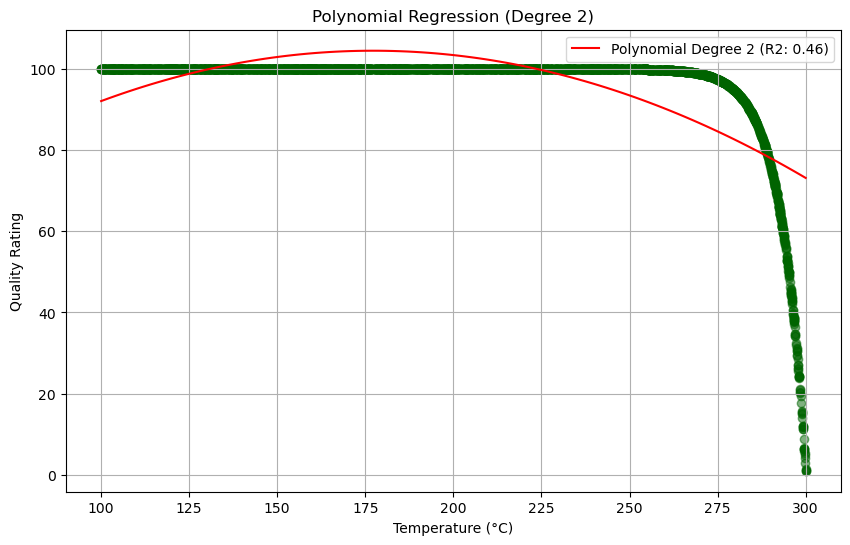

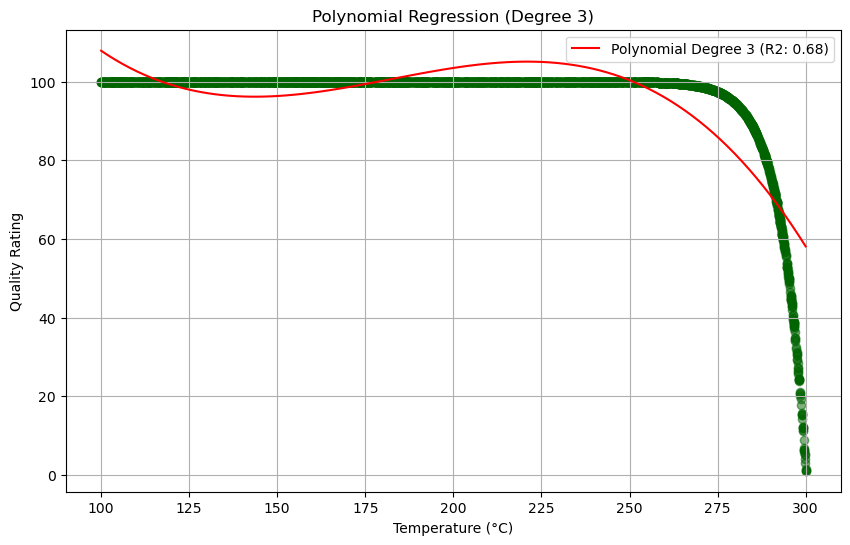

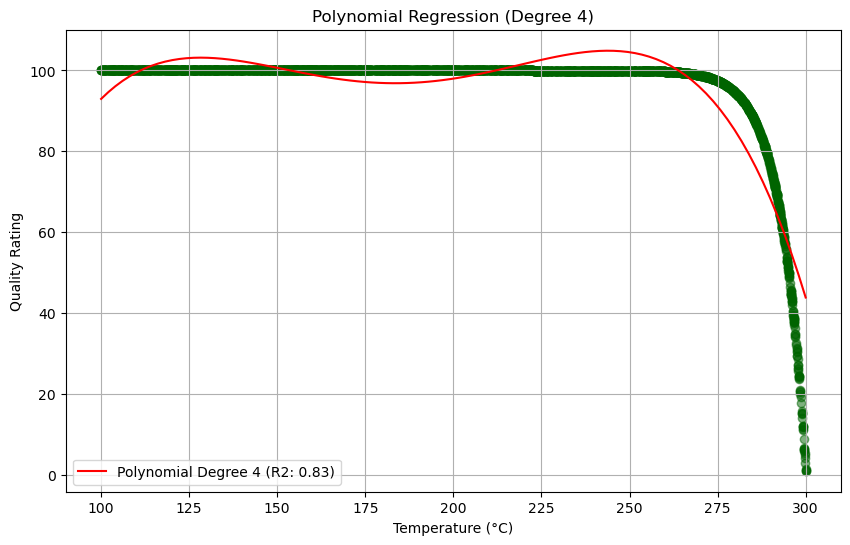

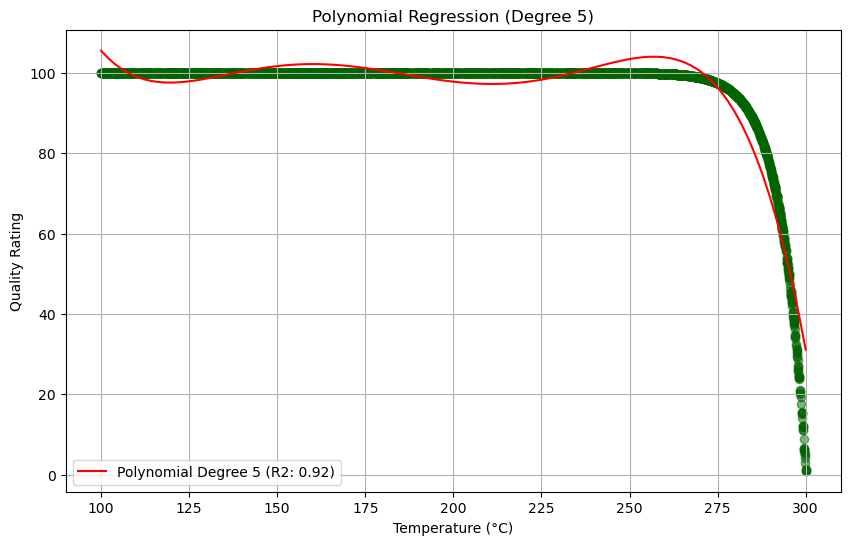

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# Function to apply polynomial regression and plot results
def apply_and_plot_polynomial_regression(degree, X_train, X_test, y_train, y_test):
    # Create polynomial features
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test_poly)
    r2 = r2_score(y_test, y_pred)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(X_train, y_train, alpha=0.5, color='darkgreen')
    plt.scatter(X_test, y_test, alpha=0.5, color='darkgreen')
    
    # Plot the model
    X_fit = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_fit = model.predict(poly.transform(X_fit))
    plt.plot(X_fit, y_fit, color='red', label=f'Polynomial Degree {degree} (R2: {r2:.2f})')

    plt.title(f'Polynomial Regression (Degree {degree})')
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Quality Rating')
    plt.legend()
    plt.grid(True)
    plt.show()

    return r2

manufacturing_data = pd.read_csv('assets/manufacturing.csv', encoding='ISO-8859-1')
manufacturing_data.rename(columns={'Temperature (Â°C)': 'Temperature (°C)'}, inplace=True)

# Preparing the data
X = manufacturing_data[['Temperature (°C)']].values
y = manufacturing_data['Quality Rating'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply and plot polynomial regression for different degrees
degrees = [2, 3, 4, 5]
for degree in degrees:
    apply_and_plot_polynomial_regression(degree, X_train, X_test, y_train, y_test)


## Logarithmic Relationship

In this example, we look at the relationship between the carat value and cost of a diamond.

Before log transformation:

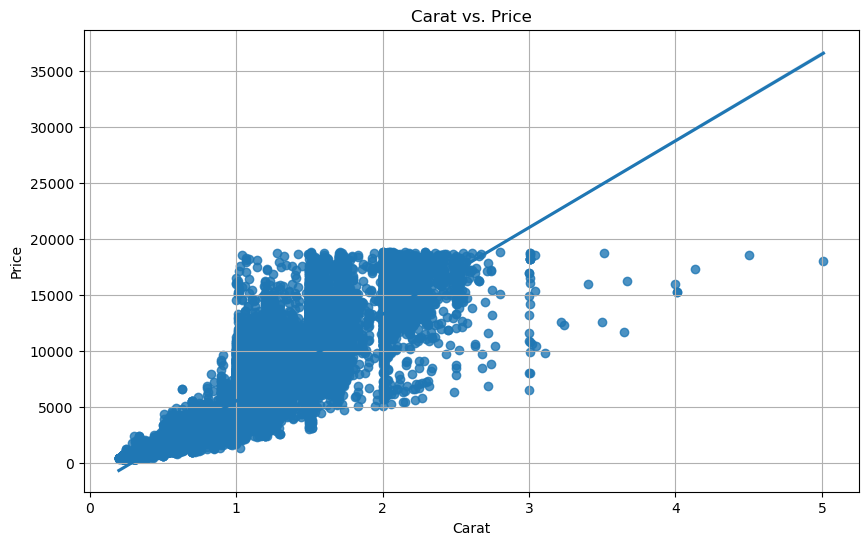

In [31]:
import numpy as np
import seaborn as sns

# Load the diamonds dataset
diamonds = sns.load_dataset('diamonds')

plt.figure(figsize=(10, 6))
sns.regplot(x = 'carat', y='price', data=diamonds)
plt.title('Carat vs. Price')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.grid(True)
plt.show()

### Experimenting with log transformations to find the best linear relationship

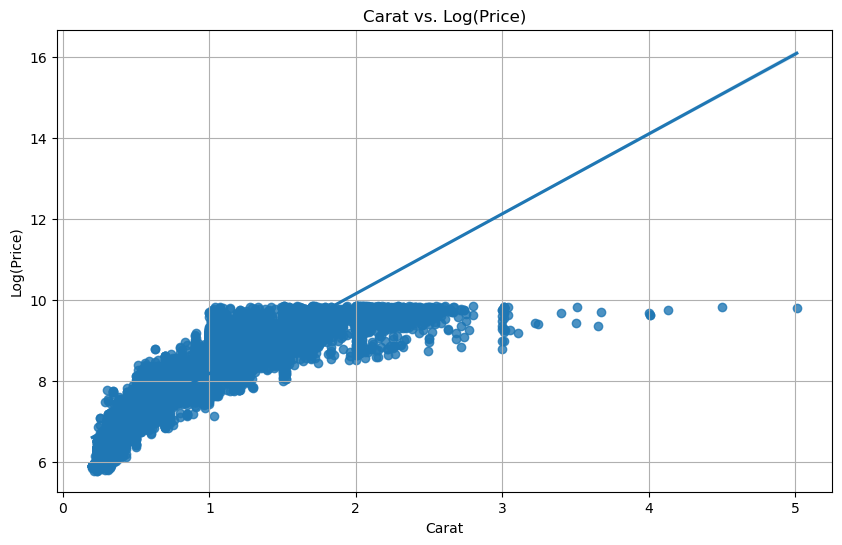

In [32]:
#Carat vs log of price

diamonds['log_carat'] = np.log(diamonds['carat'])
diamonds['log_price'] = np.log(diamonds['price'])


plt.figure(figsize=(10, 6))
sns.regplot(x = 'carat', y='log_price', data=diamonds)
plt.title('Carat vs. Log(Price)')
plt.xlabel('Carat')
plt.ylabel('Log(Price)')
plt.grid(True)
plt.show()

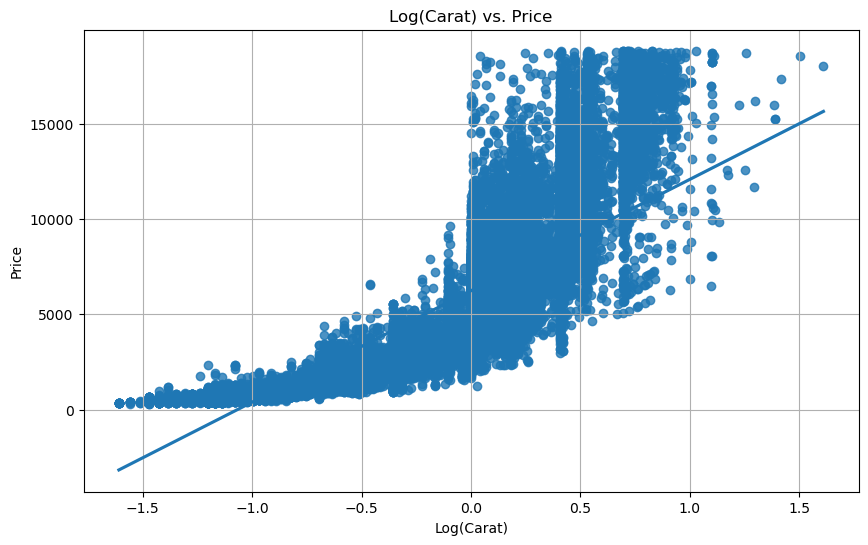

In [33]:
#Price vs log of carat

plt.figure(figsize=(10, 6))
sns.regplot(x = 'log_carat', y='price', data=diamonds)
plt.title('Log(Carat) vs. Price')
plt.xlabel('Log(Carat)')
plt.ylabel('Price')
plt.grid(True)
plt.show()

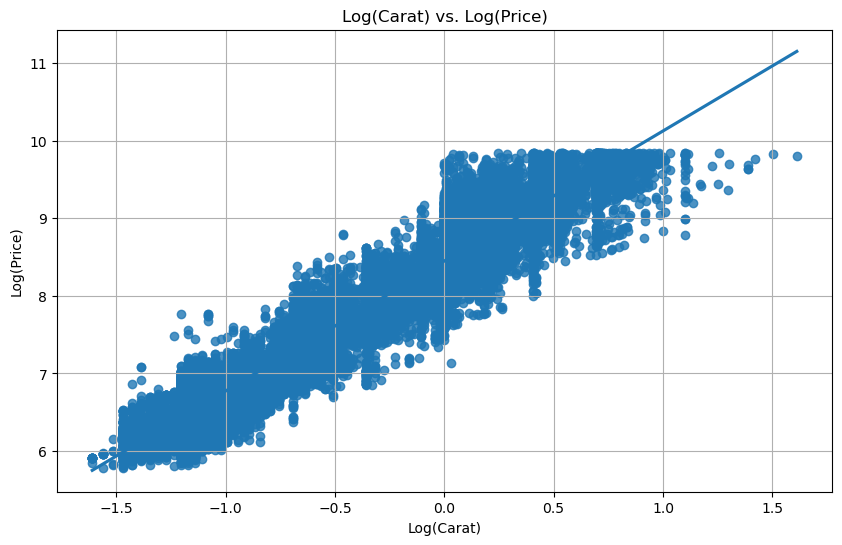

In [34]:
#Both log transformed

plt.figure(figsize=(10, 6))
sns.regplot(x = 'log_carat', y='log_price', data=diamonds)
plt.title('Log(Carat) vs. Log(Price)')
plt.xlabel('Log(Carat)')
plt.ylabel('Log(Price)')
plt.grid(True)
plt.show()

# OK
With these tools you should be able to visualize the relationship between two quantitative features and determine if other featuers in your dataset impact that relationship.  You can determine if a linear model is a good fit for the data by making a regression plot using Seaborn.